# Titanic Disaster (Part I) - Exploratory Analysis

![](titanic.png)

## Content Overview

1. Context and Scope
2. Project Data
3. Data Exploration (Part I)
4. Modelling & Predictive Analysis (Part II)
5. Experimentation & Evaluation

## 1. Context and Scope 

This analysis project aims to build a machine learning model that predicts the survivability rate of passengers abroad the infamous Titanic.

<b>About the incident</b>

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

## 2. Project Data

The Titanic dataset is provived by Kaggle as part of the <b>Titanic - Machine Learning from Disaster </b> competition, in the form of `train` and `test` sets.

* `Train.csv` contains the details of a subset of the passengers on board (891 to be exact) including features such as gender, age, accompanying siblings and parents, and most importantly, a target labels reveal specifying whether they survived or not, also known as the 'ground truth' labels.
* `test.csv` contains similar information but does not disclose the ground truth labels for passengers.

For more information, please visit: https://www.kaggle.com/competitions/titanic/overview

## 3. Data Exploration

#### Import Tools & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/train_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking dimensions
df.shape

(891, 12)

In [4]:
# Checking columns datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Checking for missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

In [7]:
# Basic descriptive statistics (numerical)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
# Basic descriptive statistics (categorical)
categories = df.dtypes[df.dtypes == 'object'].index
df[categories].describe().T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Dropping unnecessary columns

    # Resoning:
    # Passengers can still be identified by their ids
    # Cabin column contains lots of missing values
    # Ticket number column has lots of unique values hence doesn't tell us anything useful for this analysis

df.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


#### Data Wrangling & Consistency Check

In [11]:
# Transforming Survived, Pclass and Embarked columns to categorical data
survived = {0: 'deceased',
            1: 'survived'}

pclass = {1: 'upper',
          2: 'middle',
          3: 'lower'}

embarked = {'S':'southampton',
            'C':'cherbourg',
            'Q':'queenstown'}

df['Survived'] = df['Survived'].map(survived)
df['Pclass'] = df['Pclass'].map(pclass)
df['Embarked'] = df['Embarked'].map(embarked)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,deceased,lower,male,22.0,1,0,7.2500,southampton
1,2,survived,upper,female,38.0,1,0,71.2833,cherbourg
2,3,survived,lower,female,26.0,0,0,7.9250,southampton
3,4,survived,upper,female,35.0,1,0,53.1000,southampton
4,5,deceased,lower,male,35.0,0,0,8.0500,southampton


In [12]:
# Renaming columns
df.columns = [col.lower() for col in df.columns]

df.rename(columns={'passengerid':'passenger_id',
                   'pclass':'passenger_class',
                   'sibsp':'sibling_spouse_count',
                   'parch':'parent_children_count',
                   'embarked':'embarkation_port'},
          inplace=True)
df.head()

,passenger_id,survived,passenger_class,sex,age,sibling_spouse_count,parent_children_count,fare,embarkation_port
0,1,deceased,lower,male,22.0,1,0,7.2500,southampton
1,2,survived,upper,female,38.0,1,0,71.2833,cherbourg
2,3,survived,lower,female,26.0,0,0,7.9250,southampton
3,4,survived,upper,female,35.0,1,0,53.1000,southampton
4,5,deceased,lower,male,35.0,0,0,8.0500,southampton


In [13]:
# Checking passenger class values
df.passenger_class.value_counts(dropna=False)

passenger_class
lower     491
upper     216
middle    184
Name: count, dtype: int64

In [14]:
# Checking embarkation port values
df.embarkation_port.value_counts(dropna=False)

embarkation_port
southampton    644
cherbourg      168
queenstown      77
NaN              2
Name: count, dtype: int64

In [15]:
# Checking survived values
df.survived.value_counts(dropna=False)

survived
deceased    549
survived    342
Name: count, dtype: int64

#### Data Cleaning

In [16]:
# Handling embarkation_port null values
df.loc[df['embarkation_port'].isna()]

,passenger_id,survived,passenger_class,sex,age,sibling_spouse_count,parent_children_count,fare,embarkation_port
61,62,survived,upper,female,38.0,0,0,80.0,NaN
829,830,survived,upper,female,62.0,0,0,80.0,NaN


In [17]:
# Checking most frequent value of embarkation port
mode_value = df['embarkation_port'].mode()[0]

In [18]:
# Imputing nulls values with the mode
df['embarkation_port'] = df['embarkation_port'].fillna(mode_value)
df.isna().sum()

passenger_id               0
survived                   0
passenger_class            0
sex                        0
age                      177
sibling_spouse_count       0
parent_children_count      0
fare                       0
embarkation_port           0
dtype: int64

In [19]:
# Handling Age null values
df['age'].isna().sum()

177

In [20]:
# Calculating nulls percentage of Age column
nulls_percentage = df['age'].isna().sum().sum() / len(df['age']) * 100
nulls_percentage

19.865319865319865

In [21]:
# Getting median and mean values of Age column
median = df['age'].median()

In [22]:
# Imputing null Age values with median
df['age'] = df['age'].fillna(median)

df.isna().sum()

passenger_id             0
survived                 0
passenger_class          0
sex                      0
age                      0
sibling_spouse_count     0
parent_children_count    0
fare                     0
embarkation_port         0
dtype: int64

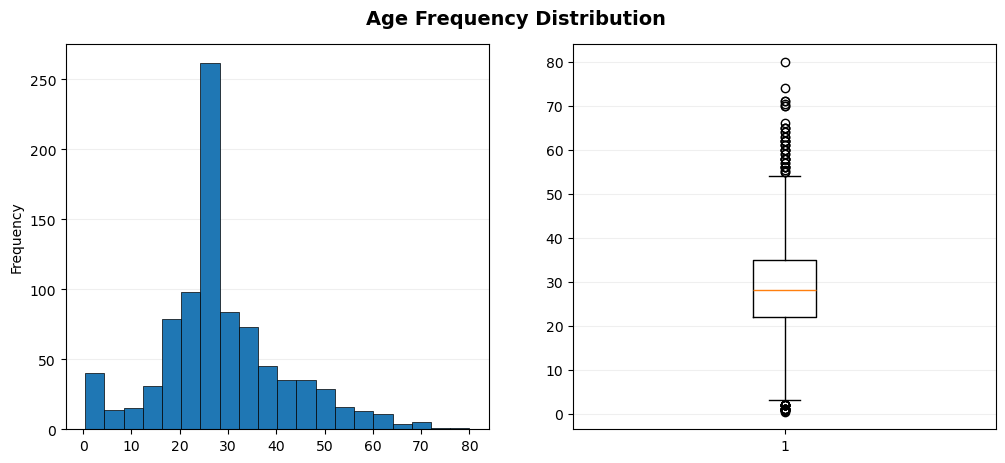

In [23]:
# Visualizing frequency distribution of age
fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(12, 5))

ax1.hist(df['age'],
         bins=20,
         edgecolor='black',
         linewidth=0.5)

ax1.set_ylabel('Frequency')

ax2.boxplot(df['age'])

ax1.yaxis.grid(True,
               alpha=0.2)
ax1.set_axisbelow(True)

ax2.yaxis.grid(True,
               alpha=0.2)
ax2.set_axisbelow(True)

fig.suptitle('Age Frequency Distribution', 
             y=0.95,
             fontsize=14,
             fontweight='bold');

The histogram shows that the most passengers on the Titanic are of age ranging between `20` to `30` years old. 

The boxplot indicates that the <b>median</b> age is `around 28`, with a some outliers representing younger and older passengers. This suggests that young adults were the predominant age group onboard.

In [24]:
#checking fare column values
df['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

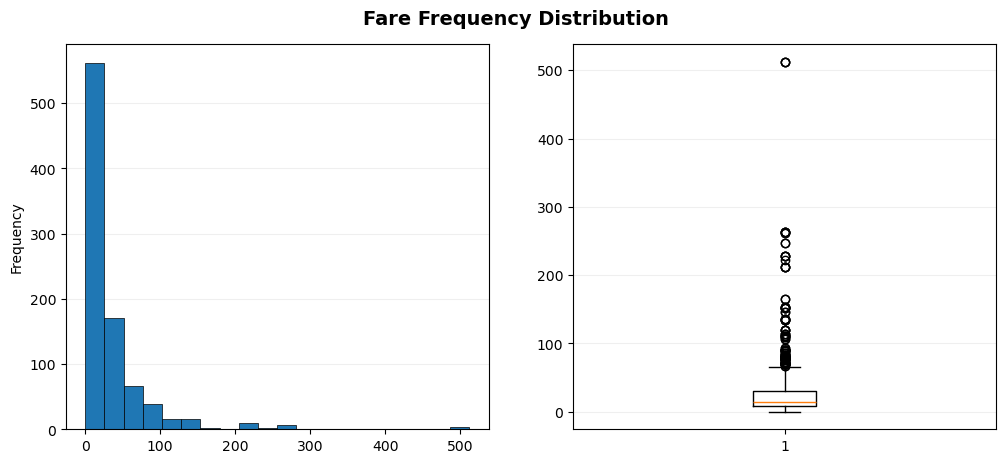

In [25]:
# Visualizing frequency distribution of fare
fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(12, 5))

ax1.hist(df['fare'],
         bins=20,
         edgecolor='black',
         linewidth=0.5)

ax1.set_ylabel('Frequency')

ax2.boxplot(df['fare'])

ax1.yaxis.grid(True,
               alpha=0.2)
ax1.set_axisbelow(True)
ax2.yaxis.grid(True,
               alpha=0.2)
ax2.set_axisbelow(True)

fig.suptitle('Fare Frequency Distribution',
             y=0.95,
             fontsize=14,
             fontweight='bold');

The fare histogram illustrates that most passengers paid <b>low fare prices</b> for their trip, with a sharp decline in frequency as fare prices increase.

The boxplot shows that a high number of paid fares were low with some extreme values, indicating that few passengers have paid significantly higher fare prices than the majority of passengers, possibly correlating with higher class passengers.

In [26]:
# Extracting family members column
df.loc[:, 'family_members'] = df['sibling_spouse_count'] + df['parent_children_count']

df.head()

,passenger_id,survived,passenger_class,sex,age,sibling_spouse_count,parent_children_count,fare,embarkation_port,family_members
0,1,deceased,lower,male,22.0,1,0,7.2500,southampton,1
1,2,survived,upper,female,38.0,1,0,71.2833,cherbourg,1
2,3,survived,lower,female,26.0,0,0,7.9250,southampton,0
3,4,survived,upper,female,35.0,1,0,53.1000,southampton,1
4,5,deceased,lower,male,35.0,0,0,8.0500,southampton,0


In [27]:
# Checking values
df['family_members'].value_counts(dropna=False)

family_members
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [28]:
# Identifying rows with high family members count
df.loc[df['family_members'] == df['family_members'].max()]

,passenger_id,survived,passenger_class,sex,age,sibling_spouse_count,parent_children_count,fare,embarkation_port,family_members
159,160,deceased,lower,male,28.0,8,2,69.55,southampton,10
180,181,deceased,lower,female,28.0,8,2,69.55,southampton,10
201,202,deceased,lower,male,28.0,8,2,69.55,southampton,10
324,325,deceased,lower,male,28.0,8,2,69.55,southampton,10
792,793,deceased,lower,female,28.0,8,2,69.55,southampton,10
846,847,deceased,lower,male,28.0,8,2,69.55,southampton,10
863,864,deceased,lower,female,28.0,8,2,69.55,southampton,10


#### Analysis

##### Titanic Disaster Casualty Rate

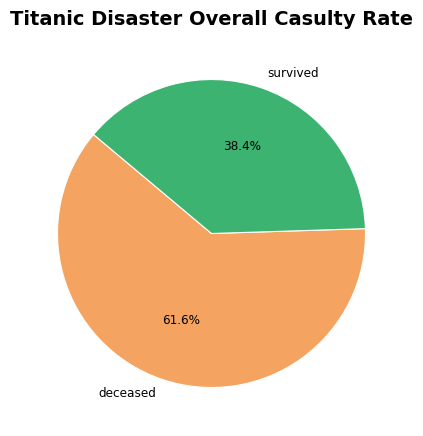

In [29]:
# Visualizing casulty rate
value_counts = df['survived'].value_counts()

fig, ax=plt.subplots(figsize=(8, 5))

ax.pie(value_counts,
       labels=value_counts.index,
       colors=['sandybrown', 'mediumseagreen'],
       startangle=140,
       autopct='%1.1f%%',
       wedgeprops = {'edgecolor':'white',
                    'linewidth':0.8},
       textprops = {'fontsize':8.7})
       

ax.set_title('Titanic Disaster Overall Casulty Rate', 
             y=1.02,
             fontsize=14,
             fontweight='bold');

The pie chart shows that `61.8%` of passengers did not survive the Titanic shipwreck, while `38.2%` did. This high fatality rate underscores the severity of the disaster.

##### Casualty rate by gender

In [30]:
casualty_by_gender = pd.crosstab(df['sex'], df['survived'])

casualty_by_gender

survived,deceased,survived
sex,,
female,81,233
male,468,109


In [31]:
# Calculating total counts and survival rates
casualty_by_gender['total_count'] = casualty_by_gender['deceased'] + casualty_by_gender['survived']

casualty_by_gender['deceased % (rel. to gender group)'] = casualty_by_gender['deceased'] / casualty_by_gender['total_count']
casualty_by_gender['survived % (rel. to gender group)'] = casualty_by_gender['survived'] / casualty_by_gender['total_count']

casualty_by_gender['deceased % (rel. to total)'] = casualty_by_gender['deceased'] / casualty_by_gender['deceased'].sum()
casualty_by_gender['survived % (rel. to total)'] = casualty_by_gender['survived'] / casualty_by_gender['survived'].sum()

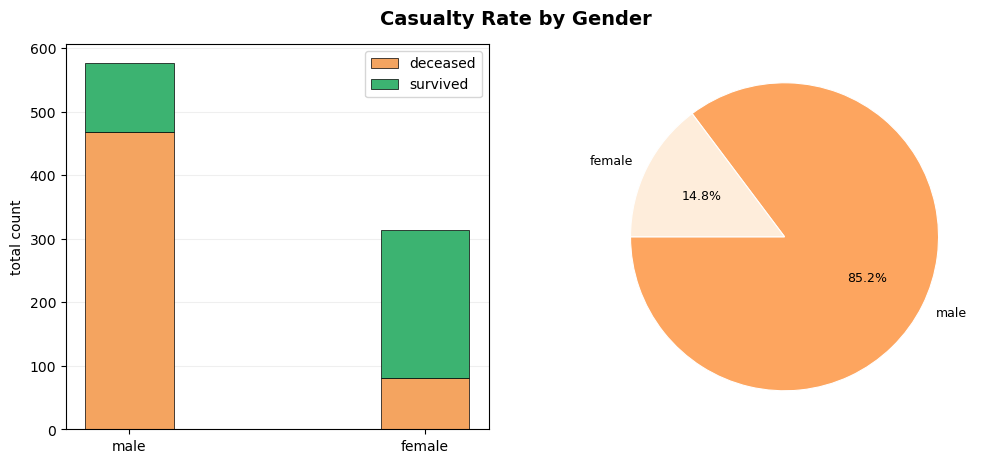

In [32]:
# Visualizing casualty rate by gender
fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(12, 5))

casualty_by_gender = casualty_by_gender.sort_values(by='deceased', ascending=False)

ax1.bar(casualty_by_gender.index,
        casualty_by_gender['deceased'],
        label='deceased',
        color='sandybrown',
        edgecolor='black',
        linewidth=0.5,
        width=0.3)
ax1.bar(casualty_by_gender.index,
        casualty_by_gender['survived'],
        label='survived',
        bottom=casualty_by_gender['deceased'],
        color='mediumseagreen',
        edgecolor='black',
        linewidth=0.5,
        width=0.3)

colors = plt.cm.Oranges(casualty_by_gender['deceased % (rel. to total)']*0.48) ##increase intensity
 
ax2.pie(casualty_by_gender['deceased'],
        labels=casualty_by_gender.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=180,
        wedgeprops={'edgecolor':'white',
                    'linewidth':0.8},
        textprops={'fontsize':9})

ax1.yaxis.grid(True,
               alpha=0.2)
ax1.set_axisbelow(True)

ax1.legend()
ax1.set_ylabel('total count')

fig.suptitle('Casualty Rate by Gender',
             y=0.95,
             fontsize=14,
             fontweight='bold');

In [33]:
casualty_by_gender

survived,deceased,survived,total_count,deceased % (rel. to gender group),survived % (rel. to gender group),deceased % (rel. to total),survived % (rel. to total)
sex,,,,,,,
male,468,109,577,0.811092,0.188908,0.852459,0.318713
female,81,233,314,0.257962,0.742038,0.147541,0.681287


Male passengers had a significantly higher casualty rate than females as depicted in both the bar and pie charts. 

Almost `75%` of female passengers survived the Titanic shipwreck, while approx. `81%` of male passenger perished.

##### Casualty rate by age group

In [34]:
# Deriving age group variable
df.loc[df['age'] < 18, 'age_group'] = 'children'
df.loc[(df['age'] >= 18) & (df['age'] < 30), 'age_group'] = 'young adults'
df.loc[(df['age'] >= 30) & (df['age'] < 60), 'age_group'] = 'adults'
df.loc[df['age'] >= 60, 'age_group'] = 'elderly'

df['age_group'].value_counts(dropna=False)

age_group
young adults    448
adults          304
children        113
elderly          26
Name: count, dtype: int64

In [35]:
# Calculating total counts and survival rates by age group
casualty_by_age = pd.crosstab(df['age_group'], df['survived'])

casualty_by_age['total_count'] = casualty_by_age['deceased'] + casualty_by_age['survived']

casualty_by_age['deceased % (rel. to age group)'] = casualty_by_age['deceased'] / casualty_by_age['total_count']
casualty_by_age['survived % (rel. to age group)'] = casualty_by_age['survived'] / casualty_by_age['total_count']

casualty_by_age['deceased % (rel. to total)'] = casualty_by_age['deceased'] / casualty_by_age['deceased'].sum()
casualty_by_age['survived % (rel. to total)'] = casualty_by_age['survived'] / casualty_by_age['survived'].sum()

casualty_by_age = casualty_by_age.sort_values(by='total_count', ascending=False)

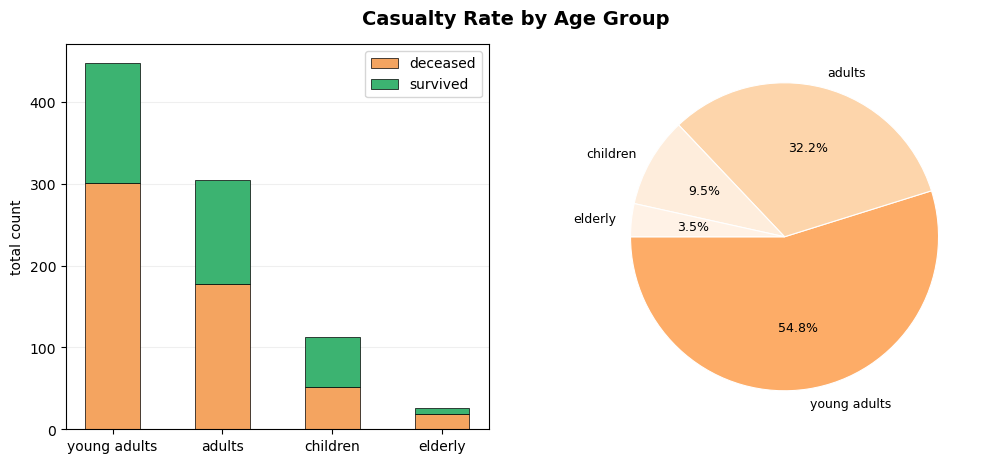

In [36]:
# visualizing casualty rate by age group
fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(12, 5))

ax1.bar(casualty_by_age.index,
        casualty_by_age['deceased'],
        color='sandybrown',
        label='deceased',
        edgecolor='Black',
        linewidth=0.5,
        width=0.5)
ax1.bar(casualty_by_age.index,
        casualty_by_age['survived'],
        color='mediumseagreen',
        label='survived',
        bottom=casualty_by_age['deceased'],
        edgecolor='Black',
        linewidth=0.5,
        width=0.5)

colors = plt.cm.Oranges(casualty_by_age['deceased % (rel. to total)'] * 0.7) ##increase intensity

ax2.pie(casualty_by_age['deceased'],
        labels=casualty_by_age.index,
        autopct='%1.1f%%',
        startangle=-180,
        colors=colors,
        wedgeprops={'edgecolor':'white',
                    'linewidth':0.8},
        textprops={'fontsize':9})


ax1.yaxis.grid(True,
               alpha=0.2)
ax1.set_axisbelow(True)

ax1.set_ylabel('total count')
ax1.legend();

fig.suptitle('Casualty Rate by Age Group',
             y=0.95,
             fontsize=14,
             fontweight='bold');

In [37]:
casualty_by_age

survived,deceased,survived,total_count,deceased % (rel. to age group),survived % (rel. to age group),deceased % (rel. to total),survived % (rel. to total)
age_group,,,,,,,
young adults,301,147,448,0.671875,0.328125,0.548270,0.429825
adults,177,127,304,0.582237,0.417763,0.322404,0.371345
children,52,61,113,0.460177,0.539823,0.094718,0.178363
elderly,19,7,26,0.730769,0.269231,0.034608,0.020468


The data shows that young adults have the highest casualty rate and make up the largest proportion among the deceased passengers. This is consistent with the age frequency distribution histogram showing them as the largest age group on the Titanic.

Over `50%` of children have survived the Titanic shipwreck. These findings — alongside the high survival rate of woman, are consistent with historical context, reflecting the enforcement of the '<b>woman and children first</b>' emergency policy.

##### Casualty rate by accompanying family members

In [38]:
# Deriving family members count
df.loc[df['family_members'] == 0, 'family_members_count'] = 'No members'
df.loc[(df['family_members'] > 0) & (df['family_members'] <= 5), 'family_members_count'] = '≤ 5 members'
df.loc[df['family_members'] > 5, 'family_members_count'] = '> 5 members'

df['family_members_count'].value_counts(dropna=False)

family_members_count
No members     537
≤ 5 members    329
> 5 members     25
Name: count, dtype: int64

In [39]:
casualty_by_fam_members = pd.crosstab(df['family_members_count'], df['survived'])

casualty_by_fam_members

survived,deceased,survived
family_members_count,,
> 5 members,21,4
No members,374,163
≤ 5 members,154,175


In [40]:
# Calculating total counts and survival rate by accompanying family members
casualty_by_fam_members['total_count'] = casualty_by_fam_members['deceased'] + casualty_by_fam_members['survived']

casualty_by_fam_members['deceased % (rel. to family group)'] = casualty_by_fam_members['deceased'] / casualty_by_fam_members['total_count']
casualty_by_fam_members['survived % (rel. to family group)'] = casualty_by_fam_members['survived'] / casualty_by_fam_members['total_count']

casualty_by_fam_members['deceased % (rel. to total)'] = casualty_by_fam_members['deceased'] / casualty_by_fam_members['deceased'].sum()
casualty_by_fam_members['survived % (rel. to total)'] = casualty_by_fam_members['survived'] / casualty_by_fam_members['survived'].sum()

casualty_by_fam_members = casualty_by_fam_members.sort_values(by='deceased', ascending=False)

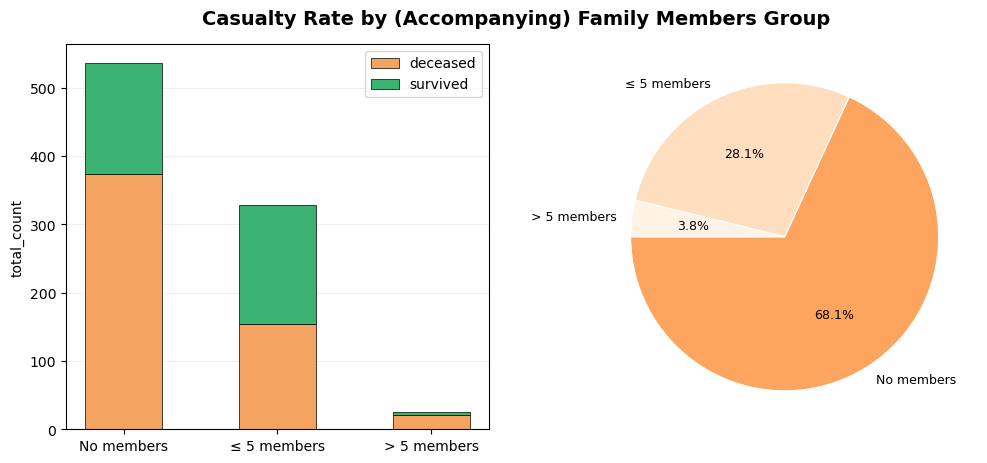

In [41]:
# Visualizing casualty rate by accompanying family members
fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(12, 5))

ax1.bar(casualty_by_fam_members.index,
        casualty_by_fam_members['deceased'],
        label='deceased',
        color='sandybrown',
        edgecolor='black',
        linewidth=0.5,
        width=0.5)
ax1.bar(casualty_by_fam_members.index,
        casualty_by_fam_members['survived'],
        label='survived',
        bottom=casualty_by_fam_members['deceased'],
        color='mediumseagreen',
        edgecolor='black',
        linewidth=0.5,
        width=0.5)

colors = plt.cm.Oranges(casualty_by_fam_members['deceased % (rel. to total)']*0.6)

ax2.pie(casualty_by_fam_members['deceased'],
        labels=casualty_by_fam_members.index,
        autopct='%1.1f%%',
        startangle=180,
        colors=colors,
        wedgeprops={'edgecolor':'white',
                    'linewidth':0.8},
        textprops={'fontsize':9})

ax1.yaxis.grid(True,
               alpha=0.2)
ax1.set_axisbelow(True)

ax1.legend()
ax1.set_ylabel('total_count');

fig.suptitle('Casualty Rate by (Accompanying) Family Members Group',
             y=0.95,
             fontsize=14,
             fontweight='bold');

In [42]:
casualty_by_fam_members

survived,deceased,survived,total_count,deceased % (rel. to family group),survived % (rel. to family group),deceased % (rel. to total),survived % (rel. to total)
family_members_count,,,,,,,
No members,374,163,537,0.696462,0.303538,0.681239,0.476608
≤ 5 members,154,175,329,0.468085,0.531915,0.280510,0.511696
> 5 members,21,4,25,0.840000,0.160000,0.038251,0.011696


The data shows that majority of passengers who perished in the Titanic shipwreck did not have accompanying family members.

We can also observe that passengers travelling with less than 5 family members had a slightly higher survival rate than other groups.

##### Casualty rate by passenger class

In [43]:
casualty_by_class = pd.crosstab(df['passenger_class'], df['survived'])

casualty_by_class

survived,deceased,survived
passenger_class,,
lower,372,119
middle,97,87
upper,80,136


In [44]:
# Calculating total counts and survival rate by passenger class
casualty_by_class['total_count'] = casualty_by_class['deceased'] + casualty_by_class['survived']

casualty_by_class['deceased % (rel. to pclass)'] = casualty_by_class['deceased'] / casualty_by_class['total_count']
casualty_by_class['survived % (rel. to pclass)'] = casualty_by_class['survived'] / casualty_by_class['total_count']

casualty_by_class['deceased % (rel. to total)'] = casualty_by_class['deceased'] / casualty_by_class['deceased'].sum()
casualty_by_class['survived % (rel. to total)'] = casualty_by_class['survived'] / casualty_by_class['survived'].sum()

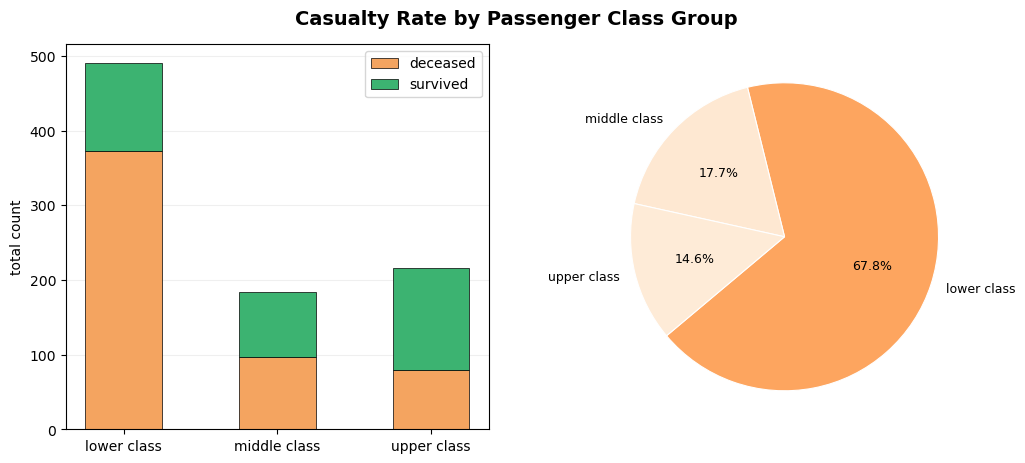

In [45]:
# Visualizing casualty rate by passenger class
fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(12, 5))

class_labels = casualty_by_class.index + ' ' + 'class'

ax1.bar(class_labels,
        casualty_by_class['deceased'],
        label='deceased',
        color='sandybrown',
        edgecolor='Black',
        linewidth=0.5,
        width=0.5)
ax1.bar(class_labels,
        casualty_by_class['survived'],
        label='survived',
        bottom=casualty_by_class['deceased'],
        color='mediumseagreen',
        edgecolor='Black',
        linewidth=0.5,
        width=0.5)

colors = plt.cm.Oranges(casualty_by_class['deceased % (rel. to total)'] * 0.6) #increase intensity

ax2.pie(casualty_by_class['deceased'],
        labels=class_labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=220,
        wedgeprops={'edgecolor':'White',
                    'linewidth': 0.8},
        textprops={'fontsize':9})

ax1.yaxis.grid(True,
               alpha=0.2)
ax1.set_axisbelow(True)

ax1.set_ylabel('total count')
ax1.legend();

fig.suptitle('Casualty Rate by Passenger Class Group',
             y=0.95,
             fontsize=14,
             fontweight='bold');

In [46]:
casualty_by_class

survived,deceased,survived,total_count,deceased % (rel. to pclass),survived % (rel. to pclass),deceased % (rel. to total),survived % (rel. to total)
passenger_class,,,,,,,
lower,372,119,491,0.757637,0.242363,0.677596,0.347953
middle,97,87,184,0.527174,0.472826,0.176685,0.254386
upper,80,136,216,0.370370,0.629630,0.145719,0.397661


The data shows that casualty rate was highest among lower class passengers, while middle and upper class passengers having a much higher survival rate.

Almost `63%` of upper class passengers survived the Titanic shipwreck, followed by middle class passengers with approx. `47%` and lastly, lower class passengers with approx. `24%`.

##### Survival Rate by Average Fare and Passenger Class

In [47]:
df['survived'] = df['survived'].map({'deceased': 0, 'survived': 1}).astype(int)

fare_by_class = df.groupby(['passenger_class']).agg(avg_fare=('fare', 'mean'),
                                                    survival_rate=('survived', 'mean')).sort_values(by='avg_fare',
                                                                                                    ascending=False)

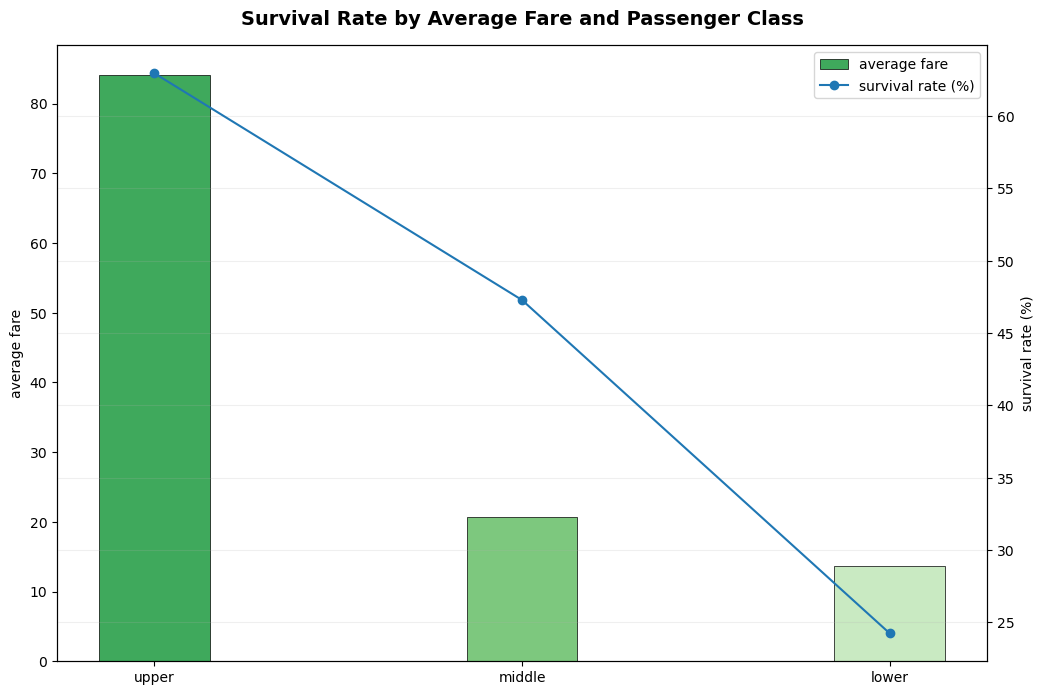

In [48]:
# Visualzing survival rate by passenger class and average fare paid
fig, ax = plt.subplots(figsize=(12, 8))

color_map = plt.cm.Greens(fare_by_class['survival_rate'])

ax.bar(fare_by_class.index,
       fare_by_class['avg_fare'],
       label='average fare',
       color=color_map,
       edgecolor='black',
       linewidth=0.5,
       width=0.3)

ax1 = ax.twinx()
ax1.plot(fare_by_class.index,
         fare_by_class['survival_rate'] * 100,
         label='survival rate (%)',
         marker='o',
         )

ax.set_ylabel('average fare')
ax1.set_ylabel('survival rate (%)')

ax1.grid(True,
         alpha=0.2)
ax1.set_axisbelow(True)

# Combine legends
bar, label_fare = ax.get_legend_handles_labels()
line, label_survival = ax1.get_legend_handles_labels()

ax1.legend(bar+line, label_fare+label_survival, loc='upper right');

ax1.set_title('Survival Rate by Average Fare and Passenger Class',
             fontsize=14,
             fontweight='bold',
             y=1.02);

In [49]:
fare_by_class

,avg_fare,survival_rate
passenger_class,,
upper,84.154687,0.629630
middle,20.662183,0.472826
lower,13.675550,0.242363


The graph shows a correlation between passenger class and survival rate, with upper class passenger having the highest survival rate and average fare paid by a large margin, compared to the middle and lower class. This suggests that passenger class and socio-economic status was a significant factor in survival.

### Decision Tree

Based on our findings so far, we can highlight the top 3 most important features contributing to passengers' survival rate in the Titanic dataset as follows: 

1. `Gender`
2. `Age group`
3. `Socio-economic class`

![](Titanic_Decision_Tree.png)

We'll be revisiting the significance of these features later on as part of our <b>Predictive Analysis</b> and <b>Feature Importances</b>.